Tyler Beaulieu  
DS5010, Fall 2024   
December 4, 2024  

<h4 style="text-align:center;">Homework 9</h4>

In [1]:
#initial imports
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy

print(scipy.__version__)

1.14.1


<div class="alert alert-block alert-info">
    <b><p style="font-size: XX-large">Problem 1: Integrals</p></b> </div>

(20 pts -5 each)

Use `scipy.integrate` to evaluate the integral of the following functions:
1. function 1: $$\int_{- \infty}^{\infty} e^{-x^2} dx$$ 

In [2]:
#Import integral function
from scipy.integrate import quad

#Define the integrand
integrand1 = lambda x : np.e**(-x**2)

#Perform the integral.
quad(integrand1, -np.inf, np.inf)

(1.772453850905516, 1.4202636757031162e-08)

2. function 2: $$ \int_{0}^{\infty} e^{-2 x} dx $$

In [3]:
#Define the integrand
integrand2 = lambda x : np.e**(-2*x)

#Perform the integral.
quad(integrand2, 0, np.inf)

(0.5, 7.735031575292565e-11)

3. function 3: $$\int_{0}^{1/2} \int_{0}^{\sqrt{1-8x^3}} x^3y \; dy \; dx$$ 

In [4]:
#Import double integrals
from scipy.integrate import dblquad

#Define the integrand
integrand3 = lambda x, y : (x**3)*y

#Define the upper and lower limits of y.
lowery = lambda x : 0
uppery = lambda x : (1-8*(x**3))**0.5

#Perform the integral.
dblquad(integrand3, 0, 0.5, lowery, uppery)

(0.014062499999999999, 5.312590645178971e-16)

4. function 3: $$\int_{0}^{1} \int_{0}^{{1}} xy \; dy \; dx$$ 

In [5]:
#Define the integrand
integrand4 = lambda x, y : x*y

#Define the upper and lower limits of y.
lowery = lambda x : 0
uppery = lambda x : 1

#Perform the integral.
dblquad(integrand3, 0, 1, lowery, uppery)

(0.125, 2.7695306645617145e-15)

---------------------

<div class="alert alert-block alert-info">
    <b><p style="font-size: XX-large">Problem 2: Interpolation</p></b> </div>

(20 pts)

Given the datasets x =[0,1,2,3,4] and y = [1,3,2,5,7], perform a **quaratic** interpolation. 
Evaluate the interpolant at 10 equally spaced points between 0 and 4 and plot both the original points and the interpolated line.

Rubric:
- (10 pts) correct interpolation
- (8 pts) Plot the original points and the interpolated points
- (2 pts) Set legend and title

Output:
<img src="problem2sample.png" width="300">

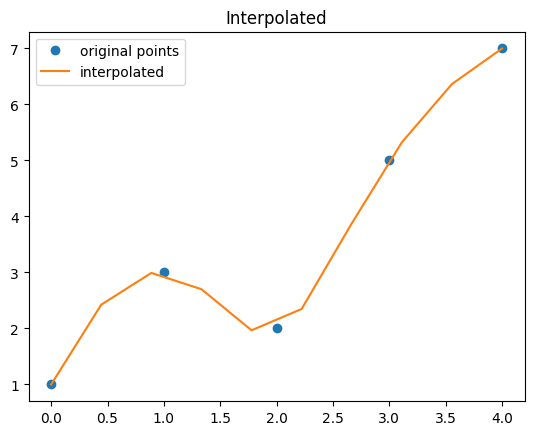

In [13]:
#Define the datasets
x =[0,1,2,3,4]
y = [1,3,2,5,7]

#Import and run the interpolation function
from scipy.interpolate import interp1d
f1 = interp1d(x, y, kind = 'quadratic')

#For the interpolant
xnew = np.linspace(0, 4, 10)

#Plot the result
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew))
plt.title('Interpolated')
plt.legend(['original points', 'interpolated']);

--------------------------

<div class="alert alert-block alert-info">
    <b><p style="font-size: XX-large">Problem 3: Imageio Read and Basic Manipulation</p></b> </div>

(20 pts)

1. Use these syntax `conda install imageio` or `pip install imageio` to firstly install `imageio`. Then import imageio by using `import imageio.v3 as iio`.

2. (5 pts) Imageio provides a number of standard images. Use imageio to read the image with a name `page.png` and show it using matplotlib 

(Hint: use `plt.imshow()` to show the image instead of the numpy array)

(note: [how to read a image from imageio](https://imageio.readthedocs.io/en/stable/examples.html#read-an-image-of-a-cat)). Use the following two line of code to read the image.

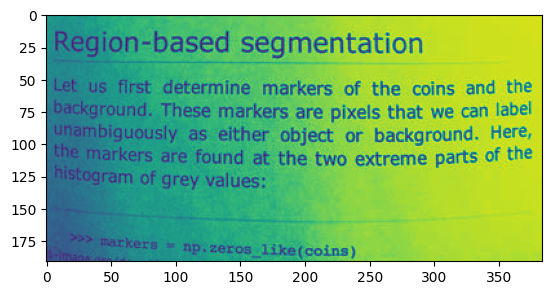

In [7]:
import imageio.v3 as iio
page = iio.imread('imageio:page.png')
plt.imshow(page)

3. (5 pts) Print the dimensions of the image, which is stored as a NumPy array. Specifically, print the type, shape, and dtype of the array to understand the image.

In [15]:
type(page)

numpy.ndarray

In [16]:
page.shape

(191, 384)

In [17]:
page.dtype

dtype('uint8')

4.  (10 pts) Flip the image up side down (note: the color of the image should remain the same) and plot both original image and the flipped image in one figure using `plt.subplot()`. Add proper title for each subplot.

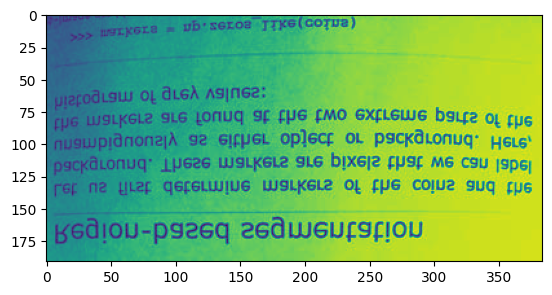

In [20]:
rotate_page = np.flip(page, axis=0)
plt.imshow(rotate_page)

----------------------------

<div class="alert alert-block alert-info">
    <b><p style="font-size: XX-large">Problem 4: Ndimage</p></b> </div>

(20 pts)

Use `imageio` to read the image called 'grayscale_page.png'. 

In [21]:
import imageio.v3 as iio
image = iio.imread('grayscale_page.png')

1.(10 pts) Rotate the original image, "page.png" by 60 degrees with `reshape` set to `False`. Plot both original image and the rotated image in one figure using `plt.subplot()`. Add proper title for each subplot.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

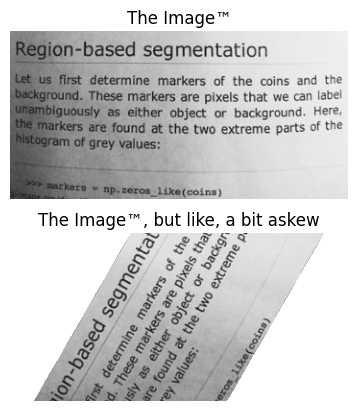

In [43]:
from scipy import ndimage

rotated = ndimage.rotate(image, angle = 60, reshape = False)

plt.subplot(2,1,1)
plt.imshow(image)
plt.axis("off")
plt.title('The Image™');
                  
plt.subplot(2,1,2)
plt.imshow(rotated)
plt.axis("off")
plt.title('The Image™, but like, a bit askew');

plt.tight_layout

2.(10 pts) Use the `sobel` filter to detect edges in 'grayscale_page.png'. Apply the filter along horizontal axis. Plot both original image and the filtered image in one figure using `plt.subplot()`. Add proper title for each subplot.

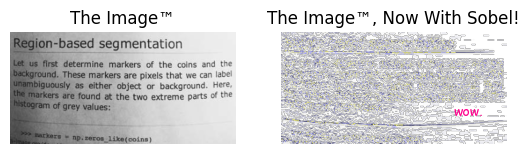

In [62]:
sobel = ndimage.sobel(image, axis=0)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title('The Image™')

plt.subplot(1, 2, 2)
plt.imshow(sobel)
plt.title('The Image™, Now With Sobel!')
plt.axis("off")
plt.text(x=270,y=130,s='wow.',fontfamily='Comic Sans MS', color='#ff028d');


----------------------

<div class="alert alert-block alert-info">
    <b><p style="font-size: XX-large">Problem 5: Optimization </p></b> </div>

(20 pts)

Find the minimum of the two-variable function: 
$$f(x,y) = |{x+3y-6}|+|2x-y|$$
over the region where 
$$0 \le x+y-5,$$
$$y \ge 0$$
$$x \ge 0$$

Set the initial guess, x0, to be [1,1]. Print the solution array and the minimum of the function.

Hint: (Copied from lecture notes)

- **`minimize(fun, x0)`** finds the minimum of a scalar function of two or more variable using the `brent` method as default.

- Parameters:
    - 2D function takes in vector $x = (x[0], x[1],\ldots)$, where $x[0]$ is first coordinate, $x[1]$ is the second coordinate, etc.
    - x0 : initial guess, an array of real elements of size (n,), n is the number of independent variables.
    - bounds = bound of variables, sequence of (min, max) pairs for each element in x
    - constraints must be specified as $g_i(x) \ge 0$
    
- We show the optimization result by a **res** variable.
    - It is a **OptimizeResult object** with some attributes:
    - x: the solution array
    - fun: gives the minimum of the function

In [65]:
fun = lambda x : np.abs(x[0]+3*x[1]-6) + np.abs(2*x[0]-x[1])

cons = ({'type': 'ineq', 'fun': lambda x: x[0] + x[1] - 5}, 
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

bnds = ((0, None), (0, None))

from scipy.optimize import minimize

res = minimize(fun, (1, 1), bounds = bnds, constraints = cons)

res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 5.666669388969533
       x: [ 1.667e+00  3.333e+00]
     nit: 21
     jac: [ 3.000e+00  2.000e+00]
    nfev: 120
    njev: 20

# Done